<a href="https://colab.research.google.com/github/lmcanavals/cs_topics/blob/main/1001_CSP_association_rules_and_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyfim &> /dev/null

In [3]:
from fim import *
import pandas as pd

In [ ]:
df_siembra = pd.read_excel("https://www.datosabiertos.gob.pe/node/6920/download")
df_siembra

In [5]:
df_siembra.rename(columns={'PROVINICA':'PROVINCIA'}, inplace=True)
df_siembra

,DEPARTAMENTO,PROVINCIA,DISTRITO,CULTIVO,CAMPANA,AGO,SEP,OCT,NOV,DIC,ENE,FEB,MAR,ABR,MAY,JUN,JUL
0,ANCASH,AIJA,SUCCHA,Papa nativa,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
1,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
2,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
3,ANCASH,ANTONIO RAYMONDI,ACZO,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
4,ANCASH,ANTONIO RAYMONDI,CHINGAS,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12176,ANCASH,RECUAY,TAPACOCHA,Cebada grano,2020-2021,0,0,0,0,0,4,5,0,0,0,0,0
12177,ANCASH,RECUAY,TAPACOCHA,Haba grano seco,2020-2021,0,0,0,0,0,3,4,0,0,0,0,0
12178,ANCASH,RECUAY,TAPACOCHA,Trigo,2020-2021,0,0,0,0,0,3,5,0,0,0,0,0
12179,ANCASH,SANTA,MACATE,Haba grano seco,2020-2021,0,0,0,0,0,3,2,0,0,0,0,0


In [6]:
print('Hay {} cultivos'.format(len(df_siembra.CULTIVO.unique())))
df_siembra.CULTIVO.unique()

Hay 26 cultivos


array(['Papa nativa', 'Olluco', 'Quinua', 'Papa color',
       'Frijol grano seco', 'Arveja grano seco', 'Arveja grano verde',
       'Zapallo', 'Cebada grano', 'Tomate', 'Papa blanca',
       'Maiz amarillo duro', 'Cebolla cabeza roja', 'Aji', 'Trigo',
       'Haba grano seco', 'Yuca', 'Zanahoria', 'Maiz choclo',
       'Maiz amilaceo', 'Ajo', 'Camote', 'Arroz cascara', 'Algodon',
       'Paprika', 'Cebolla cabeza blanca o amarilla'], dtype=object)

In [7]:
df_siembra_trans = df_siembra.copy()
df_siembra_trans['UBICACION'] = df_siembra_trans.DEPARTAMENTO + '-' + df_siembra_trans.PROVINCIA + '-' + df_siembra_trans.DISTRITO
df_siembra_trans

,DEPARTAMENTO,PROVINCIA,DISTRITO,CULTIVO,CAMPANA,AGO,SEP,OCT,NOV,DIC,ENE,FEB,MAR,ABR,MAY,JUN,JUL,UBICACION
0,ANCASH,AIJA,SUCCHA,Papa nativa,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-AIJA-SUCCHA
1,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-ANTONIO RAYMONDI-LLAMELLIN
2,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-ANTONIO RAYMONDI-LLAMELLIN
3,ANCASH,ANTONIO RAYMONDI,ACZO,Quinua,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-ANTONIO RAYMONDI-ACZO
4,ANCASH,ANTONIO RAYMONDI,CHINGAS,Olluco,2020-2021,0,0,1,0,0,0,0,0,0,0,0,0,ANCASH-ANTONIO RAYMONDI-CHINGAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12176,ANCASH,RECUAY,TAPACOCHA,Cebada grano,2020-2021,0,0,0,0,0,4,5,0,0,0,0,0,ANCASH-RECUAY-TAPACOCHA
12177,ANCASH,RECUAY,TAPACOCHA,Haba grano seco,2020-2021,0,0,0,0,0,3,4,0,0,0,0,0,ANCASH-RECUAY-TAPACOCHA
12178,ANCASH,RECUAY,TAPACOCHA,Trigo,2020-2021,0,0,0,0,0,3,5,0,0,0,0,0,ANCASH-RECUAY-TAPACOCHA
12179,ANCASH,SANTA,MACATE,Haba grano seco,2020-2021,0,0,0,0,0,3,2,0,0,0,0,0,ANCASH-SANTA-MACATE


In [8]:
df_siembra_trans = df_siembra_trans[['UBICACION', 'CULTIVO']]
df_siembra_trans

,UBICACION,CULTIVO
0,ANCASH-AIJA-SUCCHA,Papa nativa
1,ANCASH-ANTONIO RAYMONDI-LLAMELLIN,Olluco
2,ANCASH-ANTONIO RAYMONDI-LLAMELLIN,Quinua
3,ANCASH-ANTONIO RAYMONDI-ACZO,Quinua
4,ANCASH-ANTONIO RAYMONDI-CHINGAS,Olluco
...,...,...
12176,ANCASH-RECUAY-TAPACOCHA,Cebada grano
12177,ANCASH-RECUAY-TAPACOCHA,Haba grano seco
12178,ANCASH-RECUAY-TAPACOCHA,Trigo
12179,ANCASH-SANTA-MACATE,Haba grano seco


In [9]:
def to_transactional(df, column_trans, column_items):
  transactions = []
  for v in df[column_trans].unique():
    transactions.append(list(df[df[column_trans] == v][column_items].values))
    #print(v,df[df[column_trans] == v][column_items])
  return transactions

trans = to_transactional(df_siembra_trans, 'UBICACION', 'CULTIVO')
print(len(trans))

1503


In [10]:
print(df_siembra_trans.UBICACION.unique()[0], trans[0]) #transacción para el distrito 0
print(df_siembra_trans.UBICACION.unique()[20], trans[20]) #transacción para el distrito 0
print(df_siembra_trans.UBICACION.unique()[50], trans[50]) #transacción para el distrito 0
print(df_siembra_trans.UBICACION.unique()[500], trans[500]) #transacción para el distrito 0
print(df_siembra_trans.UBICACION.unique()[1200], trans[1200]) #transacción para el distrito 0

ANCASH-AIJA-SUCCHA ['Papa nativa', 'Olluco', 'Quinua', 'Papa color', 'Papa blanca', 'Frijol grano seco', 'Maiz amilaceo', 'Trigo', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco']
HUANCAVELICA-HUANCAVELICA-MARISCAL CACERES ['Papa blanca', 'Cebada grano', 'Haba grano seco', 'Maiz amilaceo', 'Arveja grano seco', 'Arveja grano verde', 'Quinua', 'Trigo', 'Maiz choclo']
ANCASH-ANTONIO RAYMONDI-SAN JUAN DE RONTOY ['Arveja grano verde', 'Olluco', 'Quinua', 'Arveja grano seco', 'Haba grano seco', 'Papa blanca', 'Maiz amilaceo', 'Papa nativa', 'Papa color', 'Cebada grano', 'Trigo']
PUNO-MOHO-MOHO ['Papa nativa', 'Arveja grano seco', 'Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco', 'Maiz amilaceo', 'Quinua', 'Trigo', 'Olluco']
SAN MARTIN-MOYOBAMBA-MOYOBAMBA ['Tomate', 'Maiz amarillo duro', 'Yuca', 'Frijol grano seco', 'Arroz cascara']


#Itemset Mining

In [11]:
r = fpgrowth(trans, supp=10) #supp >= 10% de 1503 distritos
df = pd.DataFrame(r) #convertir resultado en dataframe
df.columns = ['Itemset','Support'] #poner nombres a las columnas del df
df.sort_values(by='Support', ascending=False, inplace=True) #ordenar el df según support
df

,Itemset,Support
0,"(Maiz amilaceo,)",926
2,"(Cebada grano,)",802
6,"(Papa blanca,)",773
14,"(Trigo,)",756
254,"(Frijol grano seco,)",748
...,...,...
2905,"(Quinua, Arveja grano verde, Arveja grano seco...",151
1914,"(Maiz choclo, Papa nativa, Arveja grano seco, ...",151
2908,"(Quinua, Arveja grano verde, Arveja grano seco...",151
3029,"(Yuca, Arveja grano seco)",151


In [12]:
r = fpgrowth(trans, target='r', supp=20, report='aSC')
df = pd.DataFrame(r)
df.columns = ['Consecuente', 'Antecedente', 'Freq', 'Freq(%)', 'Conf']
df.sort_values(by='Conf', ascending=False, inplace=True)
df

,Consecuente,Antecedente,Freq,Freq(%),Conf
1392,Maiz amilaceo,"(Arveja grano verde, Haba grano seco, Trigo)",309,20.558882,100.0
1476,Maiz amilaceo,"(Maiz choclo, Papa blanca, Cebada grano)",310,20.625416,100.0
1483,Maiz amilaceo,"(Maiz choclo, Trigo, Cebada grano)",317,21.091151,100.0
756,Maiz amilaceo,"(Arveja grano seco, Frijol grano seco, Papa bl...",304,20.226214,100.0
1473,Maiz amilaceo,"(Maiz choclo, Cebada grano)",333,22.155689,100.0
...,...,...,...,...,...
1161,Papa color,"(Papa nativa, Olluco, Haba grano seco, Trigo, ...",288,19.161677,80.0
1709,Arveja grano seco,"(Quinua, Papa blanca)",264,17.564870,80.0
1418,Olluco,"(Arveja grano verde, Papa blanca, Cebada grano)",280,18.629408,80.0
567,Arveja grano seco,"(Olluco, Haba grano seco, Trigo, Cebada grano)",396,26.347305,80.0


In [13]:
help(fpgrowth)

Help on built-in function fpgrowth in module fim:

fpgrowth(...)
    fpgrowth (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
              eval='x', agg='x', thresh=10, prune=Nobe, algo='s', mode='',
              border=None)
    Find frequent item sets with the FP-growth algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support 

In [14]:
import random

In [15]:
def generarDatasetTransaccional(i, t, d):
  dataset = []
  for y in range(t):
    transaction = []
    for x in range(i):
      if random.random() <= d:
        transaction.append(1)
      else:
        transaction.append(0)
    dataset.append(transaction)
  return dataset

In [16]:
generarDatasetTransaccional(5,10,0.5)

[[1, 1, 1, 1, 1],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1],
 [0, 1, 1, 1, 0],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 0],
 [1, 0, 0, 1, 1],
 [1, 1, 1, 0, 1]]

In [17]:
ni = 5
nt = 10
d = 0.5
dataset = generarDatasetTransaccional(ni, nt, d)

In [19]:
!pip install ortools &> /dev/null

In [3]:
from ortools.sat.python import cp_model

* $T_t=1\leftrightarrow x\subseteq t$
* $T_t=1\leftrightarrow \forall i\in x,i\in t$
* $T_t=1\leftrightarrow \sum_{i\in I}I_i=\sum_{}I_i\times D_{it}$
* $T_t=1\leftrightarrow \sum_{i\in I}I_i-\sum_{}I_i\times D_{it}=0$
* $T_t=1\leftrightarrow \sum_{i\in I}I_i\times (1-D_{it})=0$

In [21]:
#crear CSP
model = cp_model.CpModel()
#variables y dominios
I = [model.NewBoolVar('it_'+str(i)) for i in range(ni)]
T = [model.NewBoolVar('tr_'+str(j)) for j in range(nt)]
freq = model.NewIntVar(0,nt,'freq')
#restricciones
for t in range(nt):
  #->
  model.Add(sum(I[i] * (1-dataset[t][i]) for i in range(ni)) == 0).OnlyEnforceIf(T[t])
  #<-
  model.Add(sum(I[i] * (1-dataset[t][i]) for i in range(ni)) != 0).OnlyEnforceIf(T[t].Not())
model.Add(freq == sum(T))
model.Add(freq >= 3)
model.Add(sum(I) > 0)

In [22]:
class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0

    def on_solution_callback(self):
        self.__solution_count += 1
        for v in self.__variables:
            #print('%s=%i' % (v, self.Value(v)), end=' ')
            print('%i' % (self.Value(v)), end=' ')
        print()

    def solution_count(self):
        return self.__solution_count

In [23]:
#solver
solver = cp_model.CpSolver()
solution_printer = VarArraySolutionPrinter(I + [freq])
solver.parameters.enumerate_all_solutions = True
status = solver.Solve(model, solution_printer)

0 1 0 0 1 3 
0 1 0 0 0 4 
0 0 0 1 1 4 
0 1 0 1 0 3 
0 0 0 0 1 6 
0 0 0 1 0 7 
0 0 1 0 0 3 
1 0 0 0 0 4 
1 1 0 0 0 3 


In [24]:
dataset

[[1, 1, 0, 1, 0],
 [0, 0, 0, 1, 1],
 [0, 1, 0, 1, 1],
 [0, 0, 0, 1, 1],
 [1, 1, 1, 0, 1],
 [0, 0, 1, 1, 0],
 [0, 0, 1, 0, 1],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [1, 1, 0, 1, 1]]

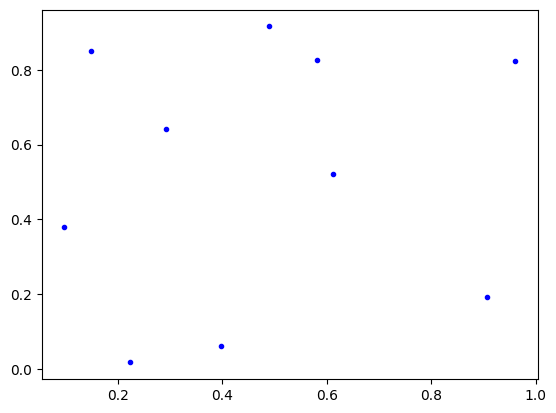

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1334).rand(10,2)
plt.scatter(x=rng[:,0], y=rng[:,1], c='b',marker='.')
plt.show()

In [4]:
k = 4 #cantidad de clusters
min_d = 50
max_d = 30

#crear CSP
model = cp_model.CpModel()
#variables y dominios
cluster = [model.NewIntVar(1,k,'cl_'+str(i)) for i in range(len(rng))]
must_link = {}
cannot_link = {}
for i in range(len(rng)):
  for j in range(i+1,len(rng)):
    must_link[(i,j)] = model.NewBoolVar('ml_'+str(i)+'_'+str(j))
    cannot_link[(i,j)] = model.NewBoolVar('cl_'+str(i)+'_'+str(j))
#restricciones
dist = lambda i,j: int(100*((rng[i][0]-rng[j][0])**2 + (rng[i][1]-rng[j][1])**2)**0.5)

for i in range(len(rng)):
  for j in range(i+1,len(rng)):
    d = model.NewIntVar(0,10000,'d')
    model.Add(d == dist(i,j))
    #mustlink <-->
    model.Add(d <= max_d).OnlyEnforceIf(must_link[(i,j)])
    model.Add(d > max_d).OnlyEnforceIf(must_link[(i,j)].Not())
    #cannotlink <-->
    model.Add(d >= min_d).OnlyEnforceIf(cannot_link[(i,j)])
    model.Add(d < min_d).OnlyEnforceIf(cannot_link[(i,j)].Not())
    #cluster -->
    model.Add(cluster[i] == cluster[j]).OnlyEnforceIf(must_link[(i,j)])
    #model.Add(cluster[i] != cluster[j]).OnlyEnforceIf(must_link[(i,j)].Not())

#solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL:
  for i in range(len(rng)):
    print(rng[i],solver.Value(cluster[i]))
  for i in range(len(rng)):
    for j in range(i+1,len(rng)):
      print(rng[i],rng[j],dist(i,j),solver.Value(must_link[(i,j)]),solver.Value(cannot_link[(i,j)]))

[0.96105303 0.82387362] 1
[0.90615265 0.19184284] 1
[0.48859163 0.91547855] 1
[0.0970729  0.37897473] 1
[0.29193959 0.64163768] 1
[0.14916355 0.85029805] 1
[0.61139809 0.52186208] 1
[0.2225075  0.01753562] 1
[0.58063091 0.82687232] 1
[0.3977777  0.06074064] 1
[0.96105303 0.82387362] [0.90615265 0.19184284] 63 0 1
[0.96105303 0.82387362] [0.48859163 0.91547855] 48 0 0
[0.96105303 0.82387362] [0.0970729  0.37897473] 97 0 1
[0.96105303 0.82387362] [0.29193959 0.64163768] 69 0 1
[0.96105303 0.82387362] [0.14916355 0.85029805] 81 0 1
[0.96105303 0.82387362] [0.61139809 0.52186208] 46 0 0
[0.96105303 0.82387362] [0.2225075  0.01753562] 109 0 1
[0.96105303 0.82387362] [0.58063091 0.82687232] 38 0 0
[0.96105303 0.82387362] [0.3977777  0.06074064] 94 0 1
[0.90615265 0.19184284] [0.48859163 0.91547855] 83 0 1
[0.90615265 0.19184284] [0.0970729  0.37897473] 83 0 1
[0.90615265 0.19184284] [0.29193959 0.64163768] 76 0 1
[0.90615265 0.19184284] [0.14916355 0.85029805] 100 0 1
[0.90615265 0.19184284]